# Machine-learning analysis - Balanced dataset - Only TNBC - Only Hugo - q-value < 1

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [3]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [4]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_q1 = pd.read_csv('Occurrence_Matrix_onlyTNrelgenes_q1_withLabels_ONLYHUGO_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.set_index(occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()
columns_with_all_zeros

0

In [6]:
(occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()

0

There are no rows and no columns with all zero values.

In [7]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_q1.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_004
2,brca_smc_2018_BB01_005
3,brca_smc_2018_BB01_008
4,brca_smc_2018_BB01_010
...,...
1053,MBCProject_pyhbI1H5
1054,MBCProject_rJHBiKTl
1055,MBCProject_rYSXcxcV
1056,MBCProject_rvULI3TV


In [8]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyhugo_onlyTN_test_pts_p005 = pd.read_csv('Test_onlyTN_onlyHugo_p005.txt', sep=',', engine='python')
onlyhugo_onlyTN_test_pts_p005

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
139,MBCProject_pktAIxFb
140,brca_smc_2018_BB01_005
141,brca_smc_2018_BB01_009
142,MBCProject_xoHAF6s8


### Study the intersection between these patients and the test patients from 1B and 2B experiments

In [9]:
pd.merge(total_patient_indices, onlyhugo_onlyTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_017
2,brca_smc_2018_BB01_037
3,brca_smc_2018_BB01_119
4,brca_smc_2018_BB01_126
...,...
122,MBCProject_2kS5fYc1
123,MBCProject_d5CbUNTb
124,MBCProject_epUYsdCE
125,MBCProject_oqupfDu7


127 out of 144 (17) of the patients in the 1B (and 2B) dataset are present in the dataset under interest.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [10]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_q1[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_008,0
brca_smc_2018_BB01_010,0
...,...
MBCProject_pyhbI1H5,0
MBCProject_rJHBiKTl,1
MBCProject_rYSXcxcV,0
MBCProject_rvULI3TV,0


In [11]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_q1.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust


There aren't patients with zero mutations.

In [13]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_q1['Target'].value_counts()

In [14]:
class_count_0

786

In [15]:
class_count_1

272

In [16]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (786, 43)
Target 1 - TN: (272, 43)


In [17]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_008
3,brca_smc_2018_BB01_010
4,brca_smc_2018_BB01_012
...,...
781,MBCProject_pktAIxFb
782,MBCProject_pyhbI1H5
783,MBCProject_rYSXcxcV
784,MBCProject_rvULI3TV


### Select the patients that you do not want to discard when balancing the datasets.

In [19]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyhugo_onlyTN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_017
2,brca_smc_2018_BR170
3,brca_smc_2018_BR331
4,brca_smc_2018_BR371
5,BR-V-028
6,BR-V-051
7,BR-M-073
8,X01BR015
9,X11BR011


In the test set you want at least these non triple negative patients.

In [20]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_005',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'BR-V-028',
 'BR-V-051',
 'BR-M-073',
 'X01BR015',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A18F',
 'TCGA-BH-A18K',
 'TCGA-BH-A1FU',
 'TCGA-C8-A12U',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E2-A14V',
 'TCGA-E9-A1R0',
 'TCGA-E9-A1RE',
 'TCGA-EW-A1PD',
 'MBC_128',
 'MBC_159',
 'MBC_178',
 'MBC_72',
 'MBC_183',
 'MBC_199',
 'MBCProject_27uAugT4',
 'MBCProject_2kS5fYc1',
 'MBCProject_pktAIxFb']

### Select the occurrence matrix associated to these NON TN patients 

In [21]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix=NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,MBCProject_pktAIxFb,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
782,MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
### extract the 73 TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
0,brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,BR-V-028,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,BR-V-051,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,BR-M-073,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,X01BR015,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,X11BR011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-M-073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
NONTN_patients_tokeep_occ_matrix2.sum(axis=1)

brca_smc_2018_BB01_005    2
brca_smc_2018_BB01_017    1
brca_smc_2018_BR170       1
brca_smc_2018_BR331       2
brca_smc_2018_BR371       2
BR-V-028                  1
BR-V-051                  1
BR-M-073                  1
X01BR015                  2
X11BR011                  1
X11BR014                  3
X21BR002                  1
TCGA-A1-A0SI              6
TCGA-A2-A0CL              1
TCGA-A2-A0EQ              2
TCGA-A2-A0YC              1
TCGA-A2-A0YH              2
TCGA-A2-A0YI              1
TCGA-A7-A0DB              2
TCGA-A7-A6VX              2
TCGA-A8-A08P              2
TCGA-A8-A093              1
TCGA-A8-A09M              1
TCGA-AC-A23E              1
TCGA-AN-A0XS              1
TCGA-AO-A03L              2
TCGA-AO-A03M              3
TCGA-AO-A0J2              1
TCGA-AR-A1AV              1
TCGA-AR-A24S              2
TCGA-B6-A0X5              1
TCGA-B6-A401              2
TCGA-BH-A0BJ              1
TCGA-BH-A0BO              1
TCGA-BH-A0H3              1
TCGA-BH-A18F        

### Create the NON TN occurrence matrix without the  patients to keep

In [25]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,brca_smc_2018_BB01_013,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,MBCProject_p1CQTdIg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
NONTN_pts_to_add_test = class_0_new.sample(13, random_state=123)
NONTN_pts_to_add_test

,Patient,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
531,TCGA-E2-A152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459,TCGA-BH-A208,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
97,BR-V-050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,TCGA-AN-A0XO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,X11BR012,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
231,TCGA-A2-A0CP,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
290,TCGA-A8-A08Z,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
483,TCGA-C8-A26X,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_NONTN_pts = pd.concat([NONTN_patients_tokeep_occ_matrix, NONTN_pts_to_add_test])
test_NONTN_pts

,Patient,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
0,brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
316,TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720,MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test_NONTN_pts['Patient'].duplicated().any()

False

In [29]:
NONTN_pts_tokeep_list2 = test_NONTN_pts['Patient'].to_list()
len(NONTN_pts_tokeep_list2)

68

In [30]:
test_NONTN_pts = test_NONTN_pts.set_index('Patient', inplace=False)
test_NONTN_pts.index.name = None
test_NONTN_pts

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# create the NON TN matrix without the patients to keep 
class_0_new2 = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list2)]
class_0_new2

,Patient,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,brca_smc_2018_BB01_013,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,MBCProject_p1CQTdIg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Triple-Negative patients 
class_1

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_epUYsdCE,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
class_1.sum(axis=1).head(30)

brca_smc_2018_BB01_004    3
brca_smc_2018_BB01_022    2
brca_smc_2018_BB01_026    3
brca_smc_2018_BB01_037    2
brca_smc_2018_BB01_041    2
brca_smc_2018_BB01_044    2
brca_smc_2018_BB01_059    2
brca_smc_2018_BB01_067    2
brca_smc_2018_BB01_074    2
brca_smc_2018_BB01_079    3
brca_smc_2018_BB01_094    2
brca_smc_2018_BB01_109    2
brca_smc_2018_BB01_110    2
brca_smc_2018_BB01_119    3
brca_smc_2018_BB01_126    2
brca_smc_2018_BR017       3
brca_smc_2018_BR041       3
brca_smc_2018_BR091       2
brca_smc_2018_BR094       2
brca_smc_2018_BR097       3
brca_smc_2018_BR105       2
brca_smc_2018_BR108       2
brca_smc_2018_BR145       2
brca_smc_2018_BR164       3
brca_smc_2018_BR200       2
brca_smc_2018_BR301       2
brca_smc_2018_BR313       2
brca_smc_2018_BR367       3
brca_smc_2018_BR393       2
brca_smc_2018_BR395       2
dtype: int64

In [34]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_037
4,brca_smc_2018_BB01_041
...,...
267,MBCProject_epUYsdCE
268,MBCProject_lQtMtjFR
269,MBCProject_oqupfDu7
270,MBCProject_pMcWcrtZ


In [35]:
TN_patient_df = TN_patient_df[TN_patient_df['Patient'] != 'brca_smc_2018_BB01_110']

In [36]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyhugo_onlyTN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
67,MBC_26
68,MBC_195
69,MBCProject_d5CbUNTb
70,MBCProject_epUYsdCE


In [37]:
TN_pts_tokeep.loc[TN_pts_tokeep['Patient']=='brca_smc_2018_BR091']

,Patient


Delete 4 patients (in the test set there must be 68 patients)

In [38]:
# patients to exclude 
patients_to_exclude_list = ['brca_smc_2018_BB01_037', 'brca_smc_2018_BB01_119', 'brca_smc_2018_BR105', 'MBCProject_d5CbUNTb']
TN_pts_tokeep2 = TN_pts_tokeep[~TN_pts_tokeep['Patient'].isin(patients_to_exclude_list)]
TN_pts_tokeep2

,Patient
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
5,brca_smc_2018_BR145
6,brca_smc_2018_BR301
7,brca_smc_2018_BR419
...,...
66,MBC_215
67,MBC_26
68,MBC_195
70,MBCProject_epUYsdCE


In [39]:
TN_pts_tokeep2['Patient'].duplicated().any()

False

In [40]:
TN_pts_tokeep_list = TN_pts_tokeep2['Patient'].tolist()
len(TN_pts_tokeep_list)

68

In [41]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list2
len(total_pts_to_keep)

136

##  Random Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [42]:
# Extract randomly 204 patients. (204+68)
class_0_under = class_0_new2.sample(204, random_state=123) # used for random sampling 
class_0_under.set_index('Patient', inplace=True)
class_0_under.index.name = None
class_0_under

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AR-A1AS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_081,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
class_0_under

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AR-A1AS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_081,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
class_1

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_epUYsdCE,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
test_NONTN_pts

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = pd.concat([class_0_under, class_1, test_NONTN_pts], axis=0)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    272
1    272
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

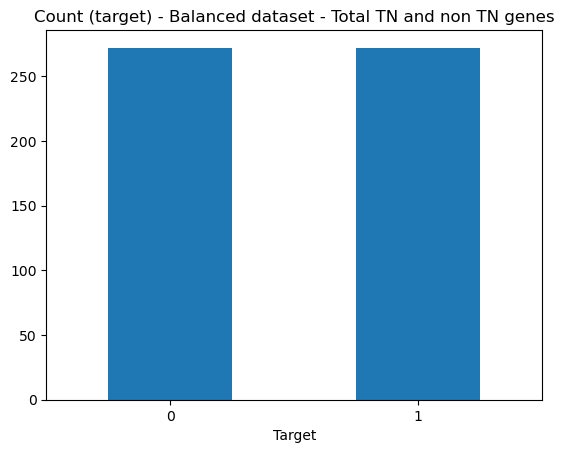

In [47]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [48]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.sum(axis=0)

TP53_270_282         50
MAML3_503_503         3
MYL10_26_26           3
PIK3CA_102_113       14
PIK3CA_541_542       20
PIK3CA_545_546       33
PIK3CA_1046_1047     96
ZKSCAN1_270_270       8
PIK3R1_566_578        7
ZNF195_109_111        5
PIK3CA_345_345       11
TP53_191_199         42
TP53_173_177         28
TP53_236_258         55
MTMR12_520_521        4
PIK3CA_418_420        3
PTEN_317_318          3
NOTCH2_2297_2303      5
TP53_211_218         19
TP53_noClust        191
PIK3CA_noClust       47
MAML3_noClust         6
PTEN_noClust         20
NOTCH2_noClust       16
CDKN2A_noClust       10
FBXW7_noClust        20
RB1_noClust          27
ZNF195_noClust        5
PIK3R1_noClust       11
C6orf118_noClust      8
STAB2_noClust        19
BRCA1_noClust        29
MGAT5B_noClust       11
MYL10_noClust         4
NUP153_noClust       11
LZTR1_noClust        11
MTMR12_noClust        6
ZKSCAN1_noClust       6
COIL_noClust          5
NBN_noClust           7
ATG4C_noClust         6
RAB42_noClust   

In [50]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [51]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all()
columns_with_all_zero

TP53_270_282        False
MAML3_503_503       False
MYL10_26_26         False
PIK3CA_102_113      False
PIK3CA_541_542      False
PIK3CA_545_546      False
PIK3CA_1046_1047    False
ZKSCAN1_270_270     False
PIK3R1_566_578      False
ZNF195_109_111      False
PIK3CA_345_345      False
TP53_191_199        False
TP53_173_177        False
TP53_236_258        False
MTMR12_520_521      False
PIK3CA_418_420      False
PTEN_317_318        False
NOTCH2_2297_2303    False
TP53_211_218        False
TP53_noClust        False
PIK3CA_noClust      False
MAML3_noClust       False
PTEN_noClust        False
NOTCH2_noClust      False
CDKN2A_noClust      False
FBXW7_noClust       False
RB1_noClust         False
ZNF195_noClust      False
PIK3R1_noClust      False
C6orf118_noClust    False
STAB2_noClust       False
BRCA1_noClust       False
MGAT5B_noClust      False
MYL10_noClust       False
NUP153_noClust      False
LZTR1_noClust       False
MTMR12_noClust      False
ZKSCAN1_noClust     False
COIL_noClust

In [52]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all().sum()

0

There are 0 columns containing all zero values.

In [53]:
#columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.eq(0).all()]
#columns_to_drop

In [54]:
# drop from the dataframe the columns containing all zeros
#occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop(columns_to_drop, axis=1)
#occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

In [55]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_BALANCED_onlyHugo.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

### Manually split the data in training set and test set 

In [57]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X 

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# sum each column
X.sum(axis=0)

TP53_270_282         50
MAML3_503_503         3
MYL10_26_26           3
PIK3CA_102_113       14
PIK3CA_541_542       20
PIK3CA_545_546       33
PIK3CA_1046_1047     96
ZKSCAN1_270_270       8
PIK3R1_566_578        7
ZNF195_109_111        5
PIK3CA_345_345       11
TP53_191_199         42
TP53_173_177         28
TP53_236_258         55
MTMR12_520_521        4
PIK3CA_418_420        3
PTEN_317_318          3
NOTCH2_2297_2303      5
TP53_211_218         19
TP53_noClust        191
PIK3CA_noClust       47
MAML3_noClust         6
PTEN_noClust         20
NOTCH2_noClust       16
CDKN2A_noClust       10
FBXW7_noClust        20
RB1_noClust          27
ZNF195_noClust        5
PIK3R1_noClust       11
C6orf118_noClust      8
STAB2_noClust        19
BRCA1_noClust        29
MGAT5B_noClust       11
MYL10_noClust         4
NUP153_noClust       11
LZTR1_noClust        11
MTMR12_noClust        6
ZKSCAN1_noClust       6
COIL_noClust          5
NBN_noClust           7
ATG4C_noClust         6
RAB42_noClust   

In [60]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y

TCGA-A2-A0EM           0
TCGA-C8-A12Q           0
MBCProject_m9SNc1Iq    0
MBCProject_1qhlIasw    0
TCGA-B6-A0I9           0
                      ..
TCGA-GM-A2DL           0
TCGA-BH-A0W7           0
TCGA-AN-A0AS           0
MBCProject_6zfRF2fl    0
TCGA-D8-A1X5           0
Name: Target, Length: 544, dtype: int64

In [61]:
# consider the balanced occurrence matrix without the pts I want to keep
total_training_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
total_training_pts_occ_matrix_balanced

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y_train = total_training_pts_occ_matrix_balanced['Target']
y_train

TCGA-A2-A0EM           0
TCGA-C8-A12Q           0
MBCProject_m9SNc1Iq    0
MBCProject_1qhlIasw    0
TCGA-B6-A0I9           0
                      ..
MBCProject_JpCASlSG    1
MBCProject_d5CbUNTb    1
MBCProject_lQtMtjFR    1
MBCProject_pMcWcrtZ    1
MBCProject_rJHBiKTl    1
Name: Target, Length: 408, dtype: int64

In [63]:
X_train = total_training_pts_occ_matrix_balanced.drop('Target', axis=1)
X_train

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
TCGA-A2-A0EM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_m9SNc1Iq,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
MBCProject_1qhlIasw,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0I9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
training_pts_list = total_training_pts_occ_matrix_balanced.index.tolist()
training_pts_list

['TCGA-A2-A0EM',
 'TCGA-C8-A12Q',
 'MBCProject_m9SNc1Iq',
 'MBCProject_1qhlIasw',
 'TCGA-B6-A0I9',
 'TCGA-D8-A1XY',
 'TCGA-E9-A1RH',
 'X11BR019',
 'MBC_180',
 'TCGA-A8-A081',
 'TCGA-B6-A0RO',
 'TCGA-A8-A06Q',
 'TCGA-A8-A09D',
 'TCGA-BH-A0E2',
 'MBC_119',
 'TCGA-C8-A12L',
 'X11BR072',
 'brca_smc_2018_BR205',
 'MBCProject_rYSXcxcV',
 'PD4093a',
 'TCGA-E2-A154',
 'TCGA-3C-AALK',
 'TCGA-D8-A1Y1',
 'X11BR075',
 'brca_smc_2018_BB01_031',
 'X06BR014',
 'TCGA-AR-A0TZ',
 'MBCProject_JGCBTpH1',
 'TCGA-EW-A1IZ',
 'brca_smc_2018_BB01_028',
 'TCGA-A8-A09Q',
 'MBCProject_mrhKt1Ue',
 'MBC_130',
 'X11BR038',
 'TCGA-C8-A1HG',
 'brca_smc_2018_BR167',
 'TCGA-AR-A24W',
 'MBC_36',
 'TCGA-BH-A1FD',
 'TCGA-BH-A18H',
 'TCGA-E2-A1B1',
 'TCGA-GM-A2D9',
 'MBC_185',
 'BR-V-015',
 'TCGA-AN-A0FT',
 'TCGA-A7-A0CH',
 'PD4094a',
 'brca_smc_2018_BR081',
 'TCGA-A8-A06X',
 'MBC_190',
 'MBCProject_beTYUZij',
 'MBCProject_74CYIyHw',
 'TCGA-GM-A2DI',
 'TCGA-A2-A0YG',
 'MBCProject_ewHohEi6',
 'X05BR005',
 'TCGA-BH-A0EA',
 'B

In [65]:
# Create a new DataFrame with the patient indices
training_pts_df = pd.DataFrame({'Patient': training_pts_list})
training_pts_df

,Patient
0,TCGA-A2-A0EM
1,TCGA-C8-A12Q
2,MBCProject_m9SNc1Iq
3,MBCProject_1qhlIasw
4,TCGA-B6-A0I9
...,...
403,MBCProject_JpCASlSG
404,MBCProject_d5CbUNTb
405,MBCProject_lQtMtjFR
406,MBCProject_pMcWcrtZ


In [66]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
# save the training patients 
training_pts_df.to_csv('Training_onlyTN_onlyhugo_q1_4B.txt', index=False, sep='\t')

In [67]:
# consider the balanced occurrence matrix with the pts I want to keep
total_test_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
total_test_pts_occ_matrix_balanced

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR419,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y_test = total_test_pts_occ_matrix_balanced['Target']
y_test

brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR145       1
brca_smc_2018_BR301       1
brca_smc_2018_BR419       1
                         ..
TCGA-GM-A2DL              0
TCGA-BH-A0W7              0
TCGA-AN-A0AS              0
MBCProject_6zfRF2fl       0
TCGA-D8-A1X5              0
Name: Target, Length: 136, dtype: int64

In [69]:
X_test = total_test_pts_occ_matrix_balanced.drop('Target', axis=1)
X_test

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR419,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
test_pts_list = total_test_pts_occ_matrix_balanced.index.tolist()
test_pts_list

['brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_67',
 'MBC_182',
 'MBC_204',
 'MBC_205',
 'MBC_215

In [71]:
# Create a new DataFrame with the patient indices
test_pts_df = pd.DataFrame({'Patient': test_pts_list})
test_pts_df

,Patient
0,brca_smc_2018_BB01_126
1,brca_smc_2018_BR097
2,brca_smc_2018_BR145
3,brca_smc_2018_BR301
4,brca_smc_2018_BR419
...,...
131,TCGA-GM-A2DL
132,TCGA-BH-A0W7
133,TCGA-AN-A0AS
134,MBCProject_6zfRF2fl


In [72]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# save the training patients 
test_pts_df.to_csv('Test_onlyTN_onlyhugo_q1_4B.txt', index=False, sep='\t')

In [73]:
pd.merge(test_pts_df, onlyhugo_onlyTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_126
1,brca_smc_2018_BR097
2,brca_smc_2018_BR145
3,brca_smc_2018_BR301
4,brca_smc_2018_BR419
...,...
118,MBC_183
119,MBC_199
120,MBCProject_27uAugT4
121,MBCProject_2kS5fYc1


In [74]:
X_train.columns[(X_train == 0).all(axis=0)]

Index([], dtype='object')

In [75]:
len(X_train.columns[(X_train == 0).all(axis=0)])

0

There are 0 columns in the training dataset with just 0 values. 

In [76]:
X_test

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR419,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0W7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6zfRF2fl,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MYL10_26_26', 'ZNF195_109_111', 'PTEN_317_318', 'ZNF195_noClust',
       'MYL10_noClust', 'COIL_noClust', 'RAB42_noClust'],
      dtype='object')

In [78]:
len(X_test.columns[(X_test == 0).all(axis=0)])

7

There are 7 columns in the test dataset with just zero values.

In [79]:
y_train.value_counts()

Target
0    204
1    204
Name: count, dtype: int64

In [80]:
y_test.value_counts()

Target
1    68
0    68
Name: count, dtype: int64

In [81]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [82]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
TCGA-A2-A0EM,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_m9SNc1Iq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_1qhlIasw,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0I9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_d5CbUNTb,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

0

0 columns contain NaN values, that are the columns with all zero values in the training set.

In [84]:
np.isinf(normalized_X_train).any().any()

False

In [85]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
TCGA-A2-A0EM,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_m9SNc1Iq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_1qhlIasw,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0I9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_d5CbUNTb,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
normalized_X_train.isna().any().any()

False

In [87]:
normalized_X_train.sum(axis=0)

TP53_270_282        19.5
MAML3_503_503        2.0
MYL10_26_26          3.0
PIK3CA_102_113      10.0
PIK3CA_541_542       5.0
PIK3CA_545_546      23.0
PIK3CA_1046_1047    66.0
ZKSCAN1_270_270      7.0
PIK3R1_566_578       4.0
ZNF195_109_111       5.0
PIK3CA_345_345       3.0
TP53_191_199        15.5
TP53_173_177        17.0
TP53_236_258        18.5
MTMR12_520_521       2.0
PIK3CA_418_420       2.0
PTEN_317_318         3.0
NOTCH2_2297_2303     4.0
TP53_211_218        18.0
TP53_noClust        76.0
PIK3CA_noClust      17.5
MAML3_noClust        5.0
PTEN_noClust         8.5
NOTCH2_noClust      12.0
CDKN2A_noClust       6.0
FBXW7_noClust       16.0
RB1_noClust         18.0
ZNF195_noClust       5.0
PIK3R1_noClust       9.0
C6orf118_noClust     2.5
STAB2_noClust        7.5
BRCA1_noClust       14.0
MGAT5B_noClust      10.0
MYL10_noClust        4.0
NUP153_noClust       7.0
LZTR1_noClust        7.0
MTMR12_noClust       5.0
ZKSCAN1_noClust      2.5
COIL_noClust         5.0
NBN_noClust          5.0


In [88]:
normalized_X_train.sum(axis=0).sum()

477.0

In [89]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [90]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_126,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0W7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
np.isinf(normalized_X_test).any().any()

False

In [92]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [93]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

0

0 as the number of zero columns in the training set 

In [94]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_126,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0W7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_126,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0W7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_6zfRF2fl,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
np.isinf(normalized_X_test).any().sum()

0

In [97]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Extracting the features

In [98]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_270_282',
 'MAML3_503_503',
 'MYL10_26_26',
 'PIK3CA_102_113',
 'PIK3CA_541_542',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'ZKSCAN1_270_270',
 'PIK3R1_566_578',
 'ZNF195_109_111',
 'PIK3CA_345_345',
 'TP53_191_199',
 'TP53_173_177',
 'TP53_236_258',
 'MTMR12_520_521',
 'PIK3CA_418_420',
 'PTEN_317_318',
 'NOTCH2_2297_2303',
 'TP53_211_218',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'PTEN_noClust',
 'NOTCH2_noClust',
 'CDKN2A_noClust',
 'FBXW7_noClust',
 'RB1_noClust',
 'ZNF195_noClust',
 'PIK3R1_noClust',
 'C6orf118_noClust',
 'STAB2_noClust',
 'BRCA1_noClust',
 'MGAT5B_noClust',
 'MYL10_noClust',
 'NUP153_noClust',
 'LZTR1_noClust',
 'MTMR12_noClust',
 'ZKSCAN1_noClust',
 'COIL_noClust',
 'NBN_noClust',
 'ATG4C_noClust',
 'RAB42_noClust']

In [99]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_270_282
1,MAML3_503_503
2,MYL10_26_26
3,PIK3CA_102_113
4,PIK3CA_541_542
5,PIK3CA_545_546
6,PIK3CA_1046_1047
7,ZKSCAN1_270_270
8,PIK3R1_566_578
9,ZNF195_109_111


#### Extract only the Hugo Symbol from the features 

In [100]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_270_282,TP53
1,MAML3_503_503,MAML3
2,MYL10_26_26,MYL10
3,PIK3CA_102_113,PIK3CA
4,PIK3CA_541_542,PIK3CA
5,PIK3CA_545_546,PIK3CA
6,PIK3CA_1046_1047,PIK3CA
7,ZKSCAN1_270_270,ZKSCAN1
8,PIK3R1_566_578,PIK3R1
9,ZNF195_109_111,ZNF195


In [101]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,MYL10
3,PIK3CA
4,PIK3CA
5,PIK3CA
6,PIK3CA
7,ZKSCAN1
8,PIK3R1
9,ZNF195


In [102]:
tot_features_df_onlyHugo.duplicated().sum()

19

In [103]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,MYL10
3,PIK3CA
7,ZKSCAN1
8,PIK3R1
9,ZNF195
14,MTMR12
16,PTEN
17,NOTCH2


In [104]:
tot_features_df_onlyHugo_nodup.shape

(23, 1)

### Intersection with GERSOM genes

In [105]:
# load the GERSOM list
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
gersom_genes = pd.read_csv('lista Gersom.csv', sep=None, engine='python')
gersom_genes

,﻿Hugo_symbol,Gene_type
0,ABCB11,Ereditario
1,ABL1,Drivers
2,ABL2,Actionable
3,ACVR1,Drivers
4,ACVR1B,Drivers
...,...,...
462,ZFP36L2,Drivers
463,ZMYM2,Drivers
464,ZMYM3,Drivers
465,ZNF133,Drivers


In [106]:
gersom_genes.rename(columns={'﻿Hugo_symbol': 'Hugo_Symbol'}, inplace=True)
gersom_genes[['Hugo_Symbol']]

,Hugo_Symbol
0,ABCB11
1,ABL1
2,ABL2
3,ACVR1
4,ACVR1B
...,...
462,ZFP36L2
463,ZMYM2
464,ZMYM3
465,ZNF133


In [107]:
# GERSOM + 4B genes
pd.merge(tot_features_df_onlyHugo_nodup, gersom_genes, how='inner', on=['Hugo_Symbol'])

,Hugo_Symbol,Gene_type
0,TP53,Drivers_Ereditario
1,PIK3CA,Drivers_Ereditario
2,PIK3R1,Drivers
3,PTEN,Drivers_Ereditario
4,NOTCH2,Drivers
5,CDKN2A,Drivers_Ereditario
6,FBXW7,Drivers
7,RB1,Drivers_Ereditario
8,BRCA1,Drivers_Ereditario
9,LZTR1,Drivers


## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.19463991615511306
Best cross-validation score:  0.7034025895814514


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

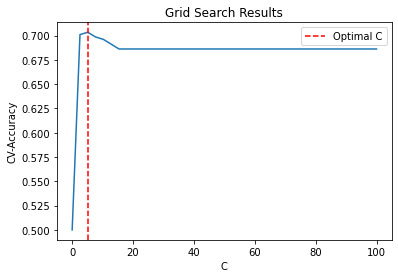

In [96]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.19463991615511306 (C=5.14).

In [97]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7034025895814514
Standard Deviation of Accuracy: 0.031464912964704786
Mean Cross-Validation Precision - 1: 0.6712636938257595
Standard Deviation of Precision - 1: 0.02795412829219251
Mean Cross-Validation Recall - 1: 0.804390243902439
Standard Deviation of Recall - 1: 0.10186132108360409
Mean Cross-Validation F1-score - 1: 0.7279755604131305
Standard Deviation of F1-score - 1: 0.04270408518003893


In [98]:
precision_scores_1 

array([0.64444444, 0.66037736, 0.69811321, 0.64285714, 0.71052632])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [99]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.7690533388239883
Standard Deviation of Precision - 0: 0.0799235437062329
Mean Cross-Validation Recall - 0: 0.6035365853658538
Standard Deviation of Recall - 0: 0.07069006343476894
Mean Cross-Validation F1-score: - 0 0.669522605908148
Standard Deviation of F1-score: - 0 0.031386213394313474


In [100]:
precision_scores_0

array([0.67567568, 0.79310345, 0.86206897, 0.84      , 0.6744186 ])

In [362]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, C=5.14)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

In [ ]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

26 features have a coefficent different from zero.

### Study of the function Lasso

In [101]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=True, intercept_scaling=10000.0, C=5.14)   

In [102]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

Liblinear failed to converge, increase the number of iterations.


LogisticRegression(C=5.14, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06,
                   warm_start=True)

In [103]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [104]:
y_pred_simple_Lasso

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

In [105]:
y_test

brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR145       1
brca_smc_2018_BR301       1
brca_smc_2018_BR419       1
                         ..
TCGA-GM-A2DL              0
TCGA-BH-A0W7              0
TCGA-AN-A0AS              0
MBCProject_6zfRF2fl       0
TCGA-D8-A1X5              0
Name: Target, Length: 136, dtype: int64

In [106]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        68
           1       0.77      0.78      0.77        68

    accuracy                           0.77       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.77      0.77      0.77       136



In [107]:
coef_indexes_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_Lasso = len(coef_indexes_Lasso)
print(f"Numero di feature con coefficiente diverso da zero: {n_features_Lasso}")

Numero di feature con coefficiente diverso da zero: 40


## Evaluate the model with classification metrics 

In [108]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7720588235294118


In [109]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[52 16]
 [15 53]]


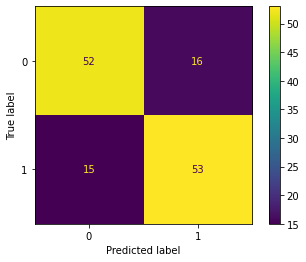

In [110]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [111]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [112]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.7681159420289855


In [113]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [114]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7794117647058824


In [115]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [116]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7737226277372262


In [117]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [118]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

53

In [119]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

52

In [120]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

16

In [121]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

15

In [122]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.544176492854384


# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  15.393076923076924
Best cross-validation score:  0.6960252935862691


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

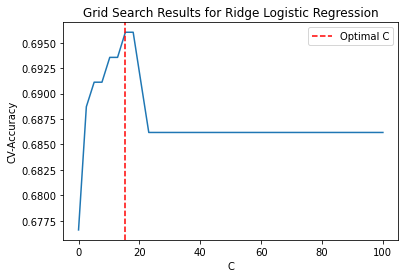

In [124]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 0.065 (C=15.39).

### Compute the classification metrics on the cross-validation results 

In [125]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.6960252935862691
Standard Deviation of Accuracy: 0.03080914001415314
Mean Cross-Validation Precision - 1: 0.6664265454609517
Standard Deviation of Precision - 1: 0.023577875633257344
Mean Cross-Validation Recall - 1: 0.7946341463414635
Standard Deviation of Recall - 1: 0.12921213690523387
Mean Cross-Validation F1-score - 1: 0.7185209220708335
Standard Deviation of F1-score - 1: 0.052931605528879946


In [126]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7663384761814696
Standard Deviation of Precision - 0: 0.09460015911054147
Mean Cross-Validation Recall - 0: 0.5987804878048781
Standard Deviation of Recall - 0: 0.08166180020869855
Mean Cross-Validation F1-score: - 0 0.6621508942250065
Standard Deviation of F1-score: - 0 0.022311337850159606


## Ridge on the test set

In [127]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=15.39)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        68
           1       0.77      0.78      0.77        68

    accuracy                           0.77       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.77      0.77      0.77       136

Numero di feature con coefficiente diverso da zero: 42
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'MAML3_503_503', 'MYL10_26_26', 'PIK3CA_102_113',
       'PIK3CA_541_542', 'PIK3CA_545_546', 'PIK3CA_1046_1047',
       'ZKSCAN1_270_270', 'PIK3R1_566_578', 'ZNF195_109_111', 'PIK3CA_345_345',
       'TP53_191_199', 'TP53_173_177', 'TP53_236_258', 'MTMR12_520_521',
       'PIK3CA_418_420', 'PTEN_317_318', 'NOTCH2_2297_2303', 'TP53_211_218',
       'TP53_noClust', 'PIK3CA_noClust', 'MAML3_noClust', 'PTEN_noClust',
       'NOTCH2_noClust', 'CDKN2A_noClust', 'FBXW7_noClust', 'RB1_noClust',
       'ZNF195_noClust', 'PIK3R1_noClust', 'C6orf1

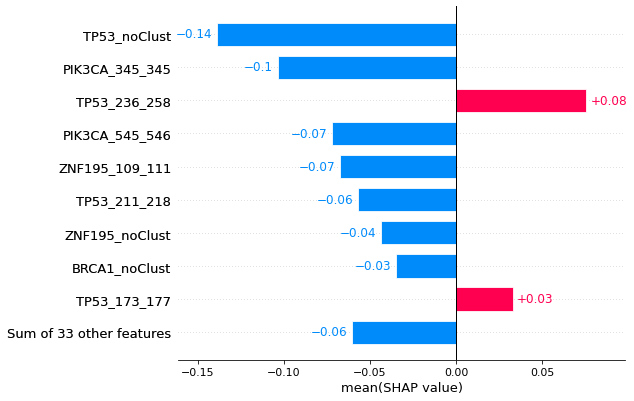

In [128]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [129]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=15.39)

In [130]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=15.39, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [131]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [132]:
y_pred_simple_Ridge

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [133]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7720588235294118


In [134]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[52 16]
 [15 53]]


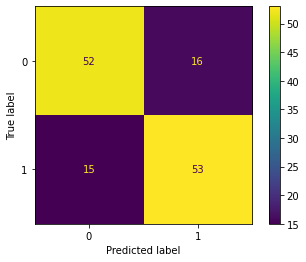

In [135]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [136]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7681159420289855


In [137]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.7794117647058824


In [138]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.7737226277372262


In [139]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

53

In [140]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

52

In [141]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

16

In [142]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

15

In [143]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.544176492854384


# Full Logistic Regression

## Cross-validation

In [144]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.64634146 0.70731707 0.74390244 0.67901235 0.66666667]
Mean CV Accuracy: 0.688647997591087


In [145]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.688647997591087
Standard Deviation of Accuracy: 0.03396308352346041
Mean Cross-Validation Precision - 1: 0.6622369720835194
Standard Deviation of Precision - 1: 0.02920949835366275
Mean Cross-Validation Recall - 1: 0.7797560975609756
Standard Deviation of Recall - 1: 0.12004262578250727
Mean Cross-Validation F1-score - 1: 0.7105413022815199
Standard Deviation of F1-score - 1: 0.051395674500470744


In [146]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.7483102499574702
Standard Deviation of Precision - 0: 0.08818817153004986
Mean Cross-Validation Recall - 0: 0.5987804878048781
Standard Deviation of Recall - 0: 0.08019162059889559
Mean Cross-Validation F1-score: - 0 0.6567825370919433
Standard Deviation of F1-score: - 0 0.030701696733657566


## Full Logistic Regression on the test set 

In [147]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [148]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        68
           1       0.77      0.78      0.77        68

    accuracy                           0.77       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.77      0.77      0.77       136



### Study of the full logistic regression function

In [149]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [150]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [151]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [152]:
y_pred_full_logreg

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [153]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.7720588235294118


In [154]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[52 16]
 [15 53]]


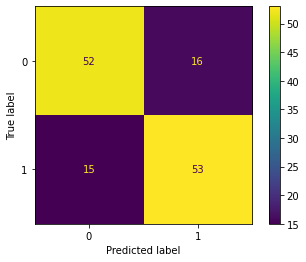

In [155]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [156]:
print("Precision ", precision(cm_full_logreg))

Precision  0.7681159420289855


In [157]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.7794117647058824


In [158]:
print("F1:", f1(cm_full_logreg))

F1: 0.7737226277372262


In [159]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

53

In [160]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

52

In [161]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

16

In [162]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

15

In [163]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.544176492854384


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 2.5738461538461537
Best cv accuracy: 0.6984342065642878


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

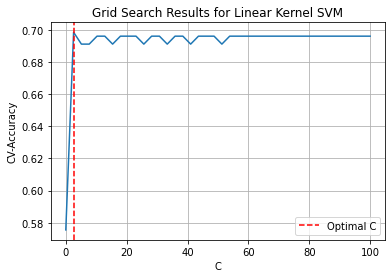

In [164]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 2.57

### Compute the classification metrics on the cross-validation results

In [165]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.6984342065642878
Standard Deviation of Accuracy: 0.042655342341222105
Mean Cross-Validation Precision - 1: 0.6607628239207187
Standard Deviation of Precision - 1: 0.02625022094318132
Mean Cross-Validation Recall - 1: 0.8141463414634146
Standard Deviation of Recall - 1: 0.10026022061710993
Mean Cross-Validation F1-score - 1: 0.727226536773672
Standard Deviation of F1-score - 1: 0.05072106007378121


In [166]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.7719521777416516
Standard Deviation of Precision - 0: 0.09105009814316256
Mean Cross-Validation Recall - 0: 0.5835365853658536
Standard Deviation of Recall - 0: 0.0495218061079194
Mean Cross-Validation F1-score: - 0 0.6596681352655834
Standard Deviation of F1-score: - 0 0.03813926853151736


# Linear SVM on the test set 

In [167]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=2.57)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [168]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        68
           1       0.75      0.79      0.77        68

    accuracy                           0.76       136
   macro avg       0.77      0.76      0.76       136
weighted avg       0.77      0.76      0.76       136



### Study of the Linear SVM function

In [169]:
clf_linear_svm = SVC(kernel='linear', C=2.57)

In [170]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=2.57, kernel='linear')

In [171]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [172]:
y_pred_linear_svm

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [173]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7647058823529411


In [174]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[50 18]
 [14 54]]


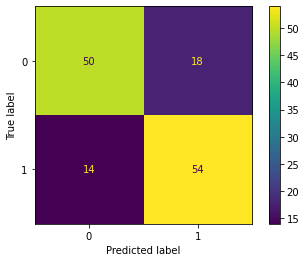

In [175]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [176]:
print("Precision ", precision(cm_linear_svm))

Precision  0.75


In [177]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.7941176470588235


In [178]:
print("F1:", f1(cm_linear_svm))

F1: 0.7714285714285715


In [179]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

54

In [180]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

50

In [181]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

18

In [182]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

14

In [183]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.5303300858899106


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [184]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 4
Best coef0: 10.0
Best cv accuracy: 0.7130081300813008


### Compute the classification metrics on the cross-validation results

In [185]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.7130081300813008
Standard Deviation of Accuracy: 0.0451649502641348
Mean Cross-Validation Precision - 1: 0.6730701971751213
Standard Deviation of Precision - 1: 0.02559347072688183
Mean Cross-Validation Recall - 1: 0.8236585365853658
Standard Deviation of Recall - 1: 0.09661615670818868
Mean Cross-Validation F1-score - 1: 0.739139806967699
Standard Deviation of F1-score - 1: 0.05470161825675552


In [186]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.784051724137931
Standard Deviation of Precision - 0: 0.08266877306715069
Mean Cross-Validation Recall - 0: 0.6030487804878049
Standard Deviation of Recall - 0: 0.026745990487147927
Mean Cross-Validation F1-score: - 0 0.678894324853229
Standard Deviation of F1-score: - 0 0.03404305756232477


## Polynomial SVM on the test set 

In [187]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=4, coef0=10)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [188]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        68
           1       0.73      0.79      0.76        68

    accuracy                           0.75       136
   macro avg       0.75      0.75      0.75       136
weighted avg       0.75      0.75      0.75       136



### Study of the Polynomial SVM function

In [189]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=4, coef0=10)

In [190]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=10, degree=4, kernel='poly')

In [191]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [192]:
y_pred_poly_svm

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [193]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.75


In [194]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[48 20]
 [14 54]]


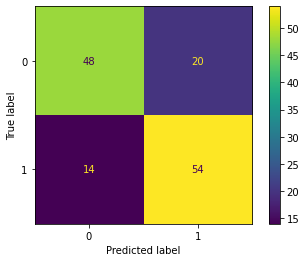

In [195]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [196]:
print("Precision ", precision(cm_poly_svm))

Precision  0.7297297297297297


In [197]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.7941176470588235


In [198]:
print("F1:", f1(cm_poly_svm))

F1: 0.7605633802816901


In [199]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

54

In [200]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

48

In [201]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

20

In [202]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

14

In [203]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5019578060538686


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [204]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 25.00075
Best gamma: 25.00075
Best cv accuracy: 0.7057813911472447


### Compute the classification metrics on the cross-validation results

In [205]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7057813911472447
Standard Deviation of Accuracy: 0.04085624888482765
Mean Cross-Validation Precision - 1: 0.739863927587721
Standard Deviation of Precision - 1: 0.03617669632574658
Mean Cross-Validation Recall - 1: 0.6419512195121951
Standard Deviation of Recall - 1: 0.1187121053222027
Mean Cross-Validation F1-score - 1: 0.6803158220983894
Standard Deviation of F1-score - 1: 0.06615531948186074


In [206]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.6909992307344224
Standard Deviation of Precision - 0: 0.061494781003310794
Mean Cross-Validation Recall - 0: 0.77
Standard Deviation of Recall - 0: 0.07251576783959371
Mean Cross-Validation F1-score: - 0 0.7234235683016171
Standard Deviation of F1-score: - 0 0.032727857541765874


### Radial SVM on the test set 

In [207]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=25, gamma=25)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [208]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.61      0.78      0.68        68
           1       0.69      0.50      0.58        68

    accuracy                           0.64       136
   macro avg       0.65      0.64      0.63       136
weighted avg       0.65      0.64      0.63       136



### Study of the Radial SVM function

In [209]:
clf_radial_svm = SVC(kernel='rbf', C=25, gamma=25)

In [210]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=25, gamma=25)

In [211]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [212]:
y_pred_radial_svm

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [213]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.6397058823529411


In [214]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[53 15]
 [34 34]]


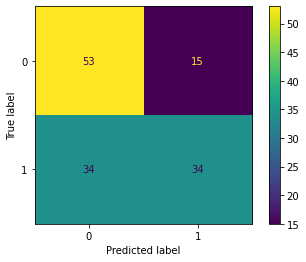

In [215]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [216]:
print("Precision ", precision(cm_radial_svm))

Precision  0.6938775510204082


In [217]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.5


In [218]:
print("F1:", f1(cm_radial_svm))

F1: 0.5811965811965812


In [219]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

34

In [220]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

53

In [221]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

15

In [222]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

34

In [223]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.2910019737416871


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [224]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 31, 'n_estimators': 400}
Best cross-validation score (accuracy): 0.747485697079193
OOB score of best model: 0.7450980392156863


### Compute the classification metrics on the cross-validation results 

In [225]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.747485697079193
Standard Deviation of Accuracy: 0.02330035787316414
Mean Cross-Validation Precision - 1: 0.718761812039123
Standard Deviation of Precision - 1: 0.024524081858189724
Mean Cross-Validation Recall - 1: 0.8189024390243903
Standard Deviation of Recall - 1: 0.0849204407734326
Mean Cross-Validation F1-score - 1: 0.7624580353233105
Standard Deviation of F1-score - 1: 0.03356593838958161


In [226]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7979744816586922
Standard Deviation of Precision - 0: 0.06478628308665858
Mean Cross-Validation Recall - 0: 0.6769512195121952
Standard Deviation of Recall - 0: 0.056625826577402505
Mean Cross-Validation F1-score: - 0 0.728066494531105
Standard Deviation of F1-score: - 0 0.019389160102251838


In [228]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=31, n_estimators=400, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [229]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        68
           1       0.73      0.69      0.71        68

    accuracy                           0.72       136
   macro avg       0.72      0.72      0.72       136
weighted avg       0.72      0.72      0.72       136



### Study the Random Forest function

In [230]:
clf_rf = RandomForestClassifier(max_features=31, n_estimators=400, random_state=123)

In [231]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=31, n_estimators=400, random_state=123)

In [232]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [233]:
y_pred_rf

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [234]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7205882352941176


In [235]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[51 17]
 [21 47]]


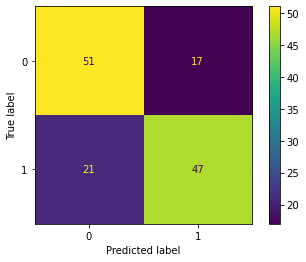

In [236]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [237]:
print("Precision ", precision(cm_rf))

Precision  0.734375


In [238]:
print("Recall:", recall(cm_rf))

Recall: 0.6911764705882353


In [239]:
print("F1:", f1(cm_rf))

F1: 0.7121212121212122


In [240]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

47

In [241]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

51

In [242]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

17

In [243]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

21

In [244]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.4419417382415922


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [245]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.1
Best Max Depth: 9
Best Number of Trees: 300
Best Accuracy: 0.7426979825353809


### Compute the classification metrics on the cross-validation results 

In [246]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.7426979825353809
Standard Deviation of Accuracy: 0.0213217717158693
Mean Cross-Validation Precision - 1: 0.7050476628755507
Standard Deviation of Precision - 1: 0.021507205132571167
Mean Cross-Validation Recall - 1: 0.8385365853658536
Standard Deviation of Recall - 1: 0.05842265335250681
Mean Cross-Validation F1-score - 1: 0.7645390577824414
Standard Deviation of F1-score - 1: 0.023712839084474937


In [247]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.8045971534027707
Standard Deviation of Precision - 0: 0.04898753131504885
Mean Cross-Validation Recall - 0: 0.6474390243902439
Standard Deviation of Recall - 0: 0.048031444192028226
Mean Cross-Validation F1-score: - 0 0.7150751044586661
Standard Deviation of F1-score: - 0 0.025704879210335194


In [249]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=300, max_depth=9, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [250]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        68
           1       0.73      0.72      0.73        68

    accuracy                           0.73       136
   macro avg       0.73      0.73      0.73       136
weighted avg       0.73      0.73      0.73       136



### Study the eXtreme Gradient Boosting function

In [251]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=300, max_depth=9, random_state=123) 

In [252]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [253]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [254]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7279411764705882


In [255]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[50 18]
 [19 49]]


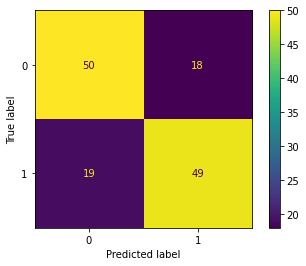

In [256]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [257]:
print("Precision ", precision(cm_xgb))

Precision  0.7313432835820896


In [258]:
print("Recall:", recall(cm_xgb))

Recall: 0.7205882352941176


In [259]:
print("F1:", f1(cm_xgb))

F1: 0.7259259259259259


In [260]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

49

In [261]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

50

In [262]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

18

In [263]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

19

In [264]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.45593165617529463
